## Author : Saurabh Kumar

In [1]:
pwd

'E:\\DataScience\\Machine_Leraning_Algo\\Hierarchical_Clustering'

In [2]:
path ='E:\\DataScience\\Machine_Leraning_Algo\\Hierarchical_Clustering'

In [3]:
import os
os.listdir()

['.ipynb_checkpoints', 'Clustering-Hierarchial.ipynb', 'Mall_Customers.csv']

## Hierarchical Clustering

Link : https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

Hierarchical clustering is one of the popular and easy to understand clustering technique. This clustering technique is divided into two types:

- Agglomerative
- Divisive

### Agglomerative Hierarchical clustering Technique:
In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward.

- Compute the proximity matrix
- Let each data point be a cluster
- Repeat: Merge the two closest clusters and update the proximity matrix
- Until only a single cluster remains


Key operation is the computation of the proximity of two clusters


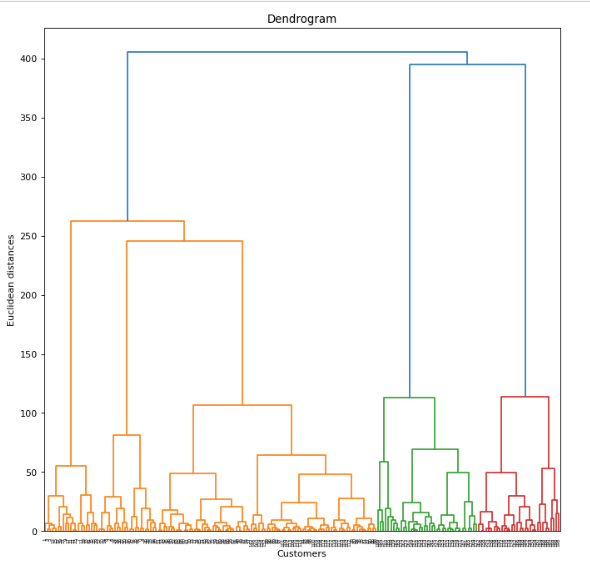

### Divisive Hierarchical clustering Technique: 
Since the Divisive Hierarchical clustering Technique is not much used in the real world, I’ll give a brief of the Divisive Hierarchical clustering Technique.

In simple words, we can say that the Divisive Hierarchical clustering is exactly the opposite of the Agglomerative Hierarchical clustering. In Divisive Hierarchical clustering, we consider all the data points as a single cluster and in each iteration, we separate the data points from the cluster which are not similar. Each data point which is separated is considered as an individual cluster. In the end, we’ll be left with n clusters.

## Lets Implement to understand

## Step 1:Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 2:Importing the dataset

In [5]:
dataset = pd.read_csv(path+'\\Mall_Customers.csv')

In [6]:
dataset.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [7]:
# picking colums 3,4
X = dataset.iloc[:, [3, 4]].values

In [8]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [9]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train.reshape(-1,1))'

## Step 4: Visualisation of Dendrogram

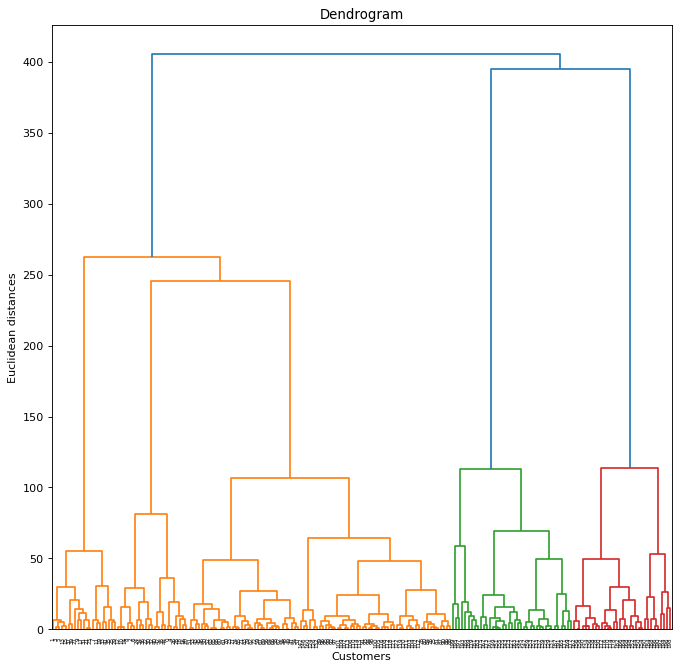

In [10]:
# Using the dendrogram to find the optimal number of clusters
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=10) 
plt.xticks( rotation='vertical')

# Visualising the clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Step-05: Fitting Hierarchical Clustering to the dataset

In [11]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## Step 4: Visualisation of Cluster

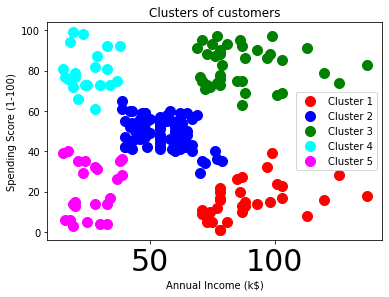

In [12]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()